<b>Mean Shift clustering is a non-parametric
  clustering algorithm that is used for unsupervised learning. It is particularly useful for applications such as image processing, computer vision, and data clustering. The algorithm is known for its simplicity and ability to discover clusters with arbitrary shapes. Mean Shift clustering does not require prior knowledge of the number of clusters, making it a suitable choice for situations where the data structure is not well-defined.:</b>

---

<b>Kernel Density Estimation (KDE):</b>

*  Mean Shift is based on the concept of
   kernel density estimation. In simple terms, it estimates the probability density function of the data points. A kernel function is applied to each data point, and the sum of these kernel functions creates a smooth density function.


<b>Mean Shift:</b>

*  The algorithm iteratively shifts each
   data point towards the mode (peak) of the estimated density function. The shift is proportional to the gradient of the density function, which guides the data points towards areas of higher density.

<b>Convergence</b>:

*  The process continues until convergence,
   where the data points settle around the peaks of the density function. The final locations of the points represent the cluster centers.

<b>Cluster Assignment</b>:

*  After convergence, data points that end
   up near the same mode are considered to belong to the same cluster.

<b>Key characteristics of Mean Shift
   clustering:</b>


*  *Parameter-Free:* Mean Shift does not
   require specifying the number of clusters beforehand, making it a parameter-free algorithm.

*  *Adaptive Bandwidth:* The algorithm uses a
  bandwidth parameter that determines the size of the kernel. The bandwidth influences the smoothness of the estimated density function and, consequently, the shape of the clusters.

*  *Sensitivity to Initial Seeds:* Mean
   shift can be sensitive to the choice of initial seed points, and different initializations may lead to different results.

*  *Computationally Intensive:* While Mean
   Shift is effective, it can be computationally intensive, especially for large datasets.

## Import Necessary libraries

In [37]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Generate Sample Data

In [60]:
initial_centers=[[2,2,3],[6,7,8],[5,10,11]]
x,_=make_blobs(n_samples=200,centers=initial_centers, cluster_std=0.6)
x,x[:,0],x[:,1]


(array([[ 5.52526786,  8.94929151, 10.5849357 ],
        [ 0.94529309,  3.0400624 ,  3.55762779],
        [ 2.42199138,  1.5689089 ,  2.59341724],
        [ 5.51094514,  9.96774707, 10.85759798],
        [ 6.10929125,  6.24582315,  7.84047829],
        [ 4.20115902,  9.40433369, 10.88073504],
        [ 1.28004114,  1.49997371,  3.06068409],
        [ 2.01359025,  1.58006703,  3.01846802],
        [ 5.50779196, 11.52672394,  9.82629466],
        [ 1.80919045,  2.28488687,  2.07532017],
        [ 4.56647868,  9.14363139, 11.35313427],
        [ 5.58977321,  9.27034909, 10.28041767],
        [ 5.45164608,  9.61451625, 10.38040195],
        [ 6.93436736,  7.87590542,  7.93254472],
        [ 7.09841451,  6.25080736,  7.89429227],
        [ 6.51390073,  6.60107335,  8.25843525],
        [ 2.66808471,  2.70847058,  3.32627899],
        [ 4.67987877, 10.00094128, 11.25528405],
        [ 5.10029581, 10.20323297,  9.64202015],
        [ 5.75114977,  8.13314835,  7.3448509 ],
        [ 6.77171824

# Visualize the datapoints on 3d plot

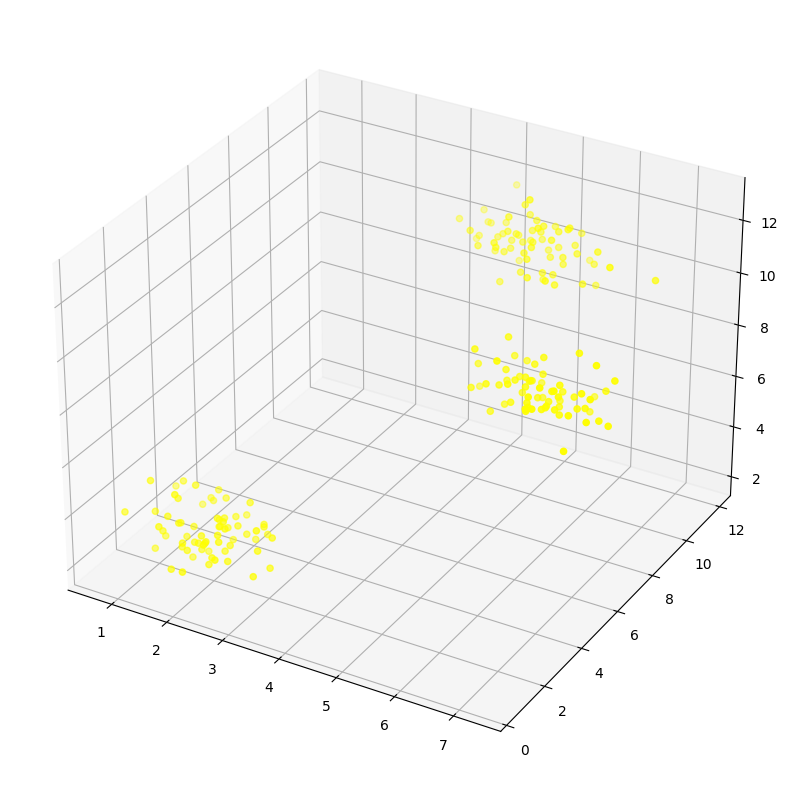

In [61]:
data_fig=plt.figure(figsize=(12,10))
ax=data_fig.add_subplot(111,projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', color ='yellow')
plt.show()

## Compute clustering with MeanShift

In [62]:
## Detect the badwith first
bandwidth=estimate_bandwidth(x,quantile=0.2, n_samples=500)
print(bandwidth)

ms=MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x)
labels=ms.labels_
cluster_centers=ms.cluster_centers_
clusters_label=np.unique(labels)
n_clusters_=len(clusters_label)
print("number of estimated clusters :%d" % n_clusters_)

1.4505880273842964
number of estimated clusters :3


## Plot datapoints with centroids

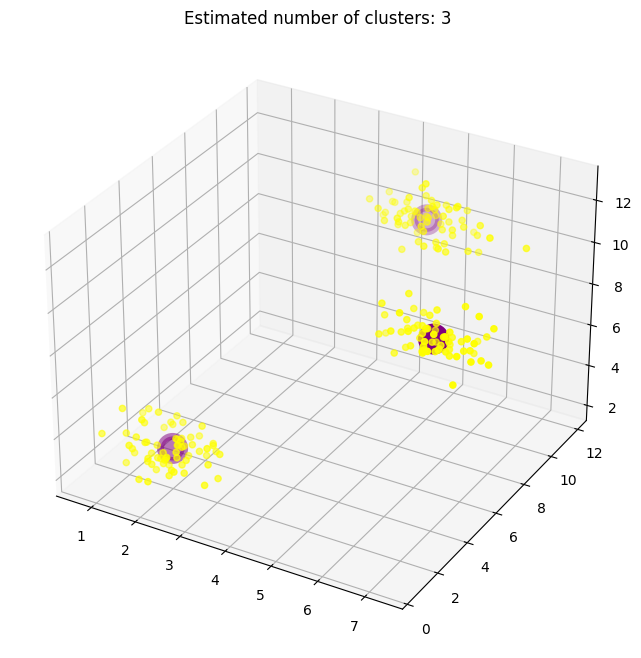

In [65]:
msc_fig=plt.figure(figsize=(10,8))
ax=msc_fig.add_subplot(111,projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', color ='yellow')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           cluster_centers[:, 2], marker ='o', color ='purple',
          s = 300, linewidth = 5, zorder = 10)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()